       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  
0    50
1    50
2    50
dtype: int64


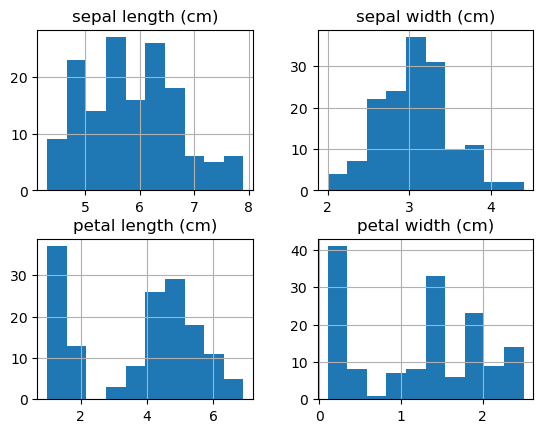

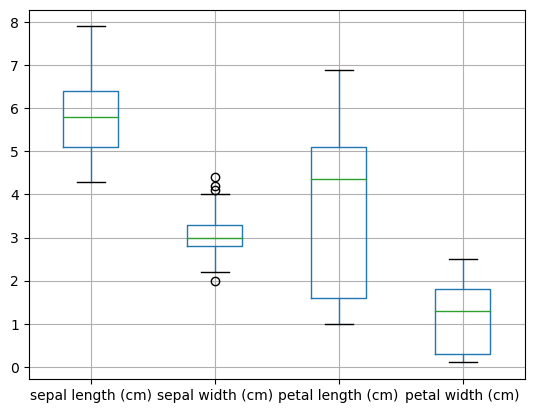

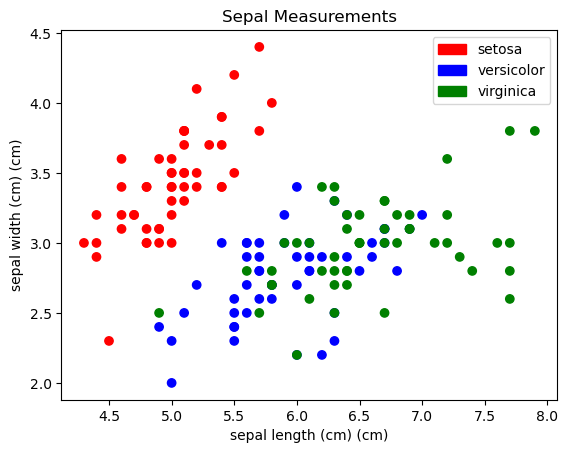

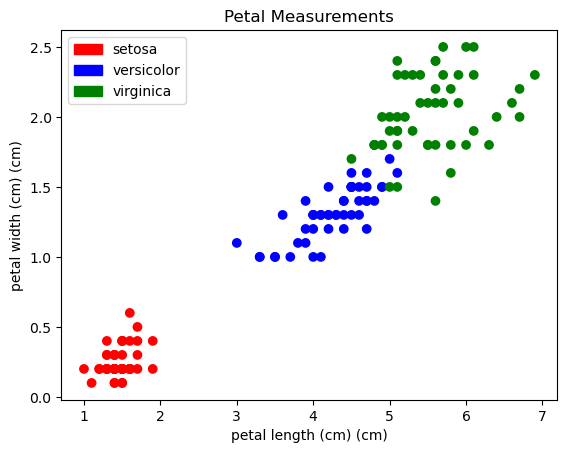

                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  
Precisión con k=5: 0.9777777777777777
Mejor k: {'n_neighbors': 3}
Precisión con k=1: 0.9555555555555556
Precisión con k=2: 0.9111111111111111
Precisión con k=3: 0.9555555555555556
Precisión con k=4: 0.9555555555555556
Precisión con k=5: 0.9777777777777777
Precisión con k=6: 0.9333333333333333
Precisión con k=7: 0.9777777777777777
Precisión con k=8: 0.9111111111111111
Precisión con k=9: 0.9555555555555556
Precisión con k=

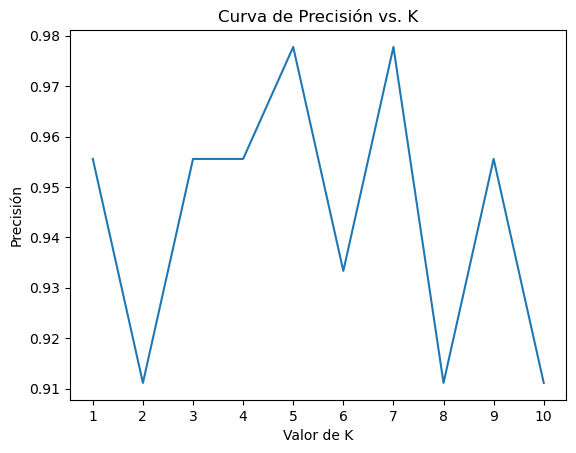

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.89      1.00      0.94        16
           2       1.00      0.90      0.95        21

    accuracy                           0.96        45
   macro avg       0.96      0.97      0.96        45
weighted avg       0.96      0.96      0.96        45

Precision: 0.9604938271604938
Recall: 0.9555555555555556
F1 Score: 0.9557516339869282


In [1]:
# Importaciones
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_recall_fscore_support
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd

# Carga de datos
iris = load_iris()
X, y = iris.data, iris.target

# Configuraciones para visualización
color_map = {0: 'red', 1: 'blue', 2: 'green'}
label_map = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}

# Funciones de utilidad
def plot_scatter(X, y, columns, title):
    colors = [color_map[c] for c in y]
    plt.scatter(X[:, columns[0]], X[:, columns[1]], c=colors)
    handles = [mpatches.Patch(color=color_map[i], label=label_map[i]) for i in range(len(label_map))]
    plt.legend(handles=handles)
    plt.xlabel(f'{iris.feature_names[columns[0]]} (cm)')
    plt.ylabel(f'{iris.feature_names[columns[1]]} (cm)')
    plt.title(title)
    plt.show()

# Estadísticas descriptivas
df = pd.DataFrame(X, columns=iris.feature_names)
print(df.describe())

# Distribución de clases
print(df.groupby(y).size())
df.head()

# Histogramas y Boxplots
df.hist()
plt.show()
df.boxplot()
plt.show()

# Gráficas de dispersión
plot_scatter(X, y, [0, 1], 'Sepal Measurements')
plot_scatter(X, y, [2, 3], 'Petal Measurements')

# Correlación
print(df.corr())

# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Función para entrenar y evaluar modelo KNN
def train_evaluate_knn(X_train, X_test, y_train, y_test, k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Precisión con k={k}:', accuracy)
    return accuracy

# Entrenar y evaluar KNN con k=5
train_evaluate_knn(X_train, X_test, y_train, y_test, 5)

# Búsqueda de mejor k con GridSearchCV
grid = GridSearchCV(KNeighborsClassifier(), {'n_neighbors': range(1, 11)}, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
print("Mejor k:", grid.best_params_)

# Curva de precisión vs K
scores = [train_evaluate_knn(X_train, X_test, y_train, y_test, k) for k in range(1, 11)]
plt.plot(range(1, 11), scores)
plt.xticks(range(1, 11))
plt.xlabel('Valor de K')
plt.ylabel('Precisión')
plt.title('Curva de Precisión vs. K')
plt.show()

# Evaluación final con mejor k
knn = KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'])
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

# Métricas adicionales
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print(f"Precision: {precision}\nRecall: {recall}\nF1 Score: {fscore}")